# <center>Jamboree Case Study</center>

# Introduction
Jamboree is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven problem-solving methods, they have helped students achieve exceptional scores on exams like GMAT, GRE and SAT with minimal effort.
To further support students, Jamboree has recently introduced a new feature on their website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants.
### What is expected
Conduct a thorough analysis to assist Jamboree in understanding the crucial factors impacting graduate admissions and their interrelationsships. Additionally provide predictive insights to determine an individual's admission chances based on various variables.

# 1. Data
The analysis was done on the data located at - https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv


# 2. Libraries
Below are the libraries required for analysing and visualizing data

In [1]:
# libraries to analyze data
import numpy as np
import pandas as pd
import scipy.stats as sps

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 3. Data Loading
Loading the data into Pandas dataframe for easily handling of data

In [2]:
# read the file into a pandas dataframe
customer_df = pd.read_csv('Jamboree_Admission.csv')
df = customer_df
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')
print('*************************************************')

*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None
*************************************************

*************************************************
Shape of the dataset is (500, 9)
*************************************************

*************************************************
Number of nan/null values i

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
# look at the top 5 rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Insight
- There are **500 unique** applicants 
- There are no **null values**
- There are no **duplicates**
- There is a space after *LOR* and *Chance of Admit* column name
- The column *Serial No.* can be dropped as it doesnt provide any additional information that what is provided by the dataframe's index.
- The *GRE Score* in the dataset ranges from 290 to 340 and hence can be converted to datatype int16
- The *TOEFL Score* in the dataset ranges from 92 to 120 and hence can be converted to datatype int8
- The *University Rating* in the dataset ranges from 1 to 5 and hence can be converted to datatype int8
- The *SOP* in the dataset ranges from 1 to 5 and hence can be converted to datatype float32
- The *LOR* in the dataset ranges from 1 to 5 and hence can be converted to datatype float32
- The *CGPA* in the dataset ranges from 6.8 to 9.92 and hence can be converted to datatype float32
- The *Research* in the dataset has values 0 and 1 and hence can be converted to datatype bool
- The *Chance of Admit* in the dataset ranges from 0.34 to 0.97 and hence can be converted to datatype float32

In [6]:
df = df.drop(columns = 'Serial No.')

df.rename(columns = {'LOR ':'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace=True)

df['GRE Score'] = df['GRE Score'].astype('int16')
df['TOEFL Score'] = df['TOEFL Score'].astype('int8')
df['University Rating'] = df['University Rating'].astype('int8')
df['SOP'] = df['SOP'].astype('float32')
df['LOR'] = df['LOR'].astype('float32')
df['CGPA'] = df['CGPA'].astype('float32')
df['Research'] = df['Research'].astype('bool')
df['Chance of Admit'] = df['Chance of Admit'].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int16  
 1   TOEFL Score        500 non-null    int8   
 2   University Rating  500 non-null    int8   
 3   SOP                500 non-null    float32
 4   LOR                500 non-null    float32
 5   CGPA               500 non-null    float32
 6   Research           500 non-null    bool   
 7   Chance of Admit    500 non-null    float32
dtypes: bool(1), float32(4), int16(1), int8(2)
memory usage: 10.4 KB


In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,True,0.92
1,324,107,4,4.0,4.5,8.87,True,0.76
2,316,104,3,3.0,3.5,8.00,True,0.72
3,322,110,3,3.5,2.5,8.67,True,0.80
4,314,103,2,2.0,3.0,8.21,False,0.65


### Insight
- The **memory usage** for the dataframe **reduced by 70%**, from 35.3 KB to 10.4 KB

# 4. Exploratory Data Analysis
## 4.1. Detecting outliers
### 4.1.1. Outliers for every continuous variable

In [8]:
# helper function to detect outliers 
def detectOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_outliers = df[df<(q1-1.5*iqr)]
    higher_outliers = df[df>(q3+1.5*iqr)]
    return lower_outliers, higher_outliers

In [9]:
numerical_columns = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
column_outlier_dictionary = {}
for column in numerical_columns:
    print('*'*50)
    print(f'Outliers of \'{column}\' column are:')
    lower_outliers, higher_outliers = detectOutliers(df[column])
    print("Lower outliers:\n", lower_outliers)
    print("Higher outliers:\n", higher_outliers)    
    print('*'*50, end="\n")
    column_outlier_dictionary[column] = [lower_outliers, higher_outliers]

**************************************************
Outliers of 'GRE Score' column are:
Lower outliers:
 Series([], Name: GRE Score, dtype: int16)
Higher outliers:
 Series([], Name: GRE Score, dtype: int16)
**************************************************
**************************************************
Outliers of 'TOEFL Score' column are:
Lower outliers:
 Series([], Name: TOEFL Score, dtype: int8)
Higher outliers:
 Series([], Name: TOEFL Score, dtype: int8)
**************************************************
**************************************************
Outliers of 'CGPA' column are:
Lower outliers:
 Series([], Name: CGPA, dtype: float32)
Higher outliers:
 Series([], Name: CGPA, dtype: float32)
**************************************************
**************************************************
Outliers of 'Chance of Admit' column are:
Lower outliers:
 92     0.34
376    0.34
Name: Chance of Admit, dtype: float32
Higher outliers:
 Series([], Name: Chance of Admit, dtype: float

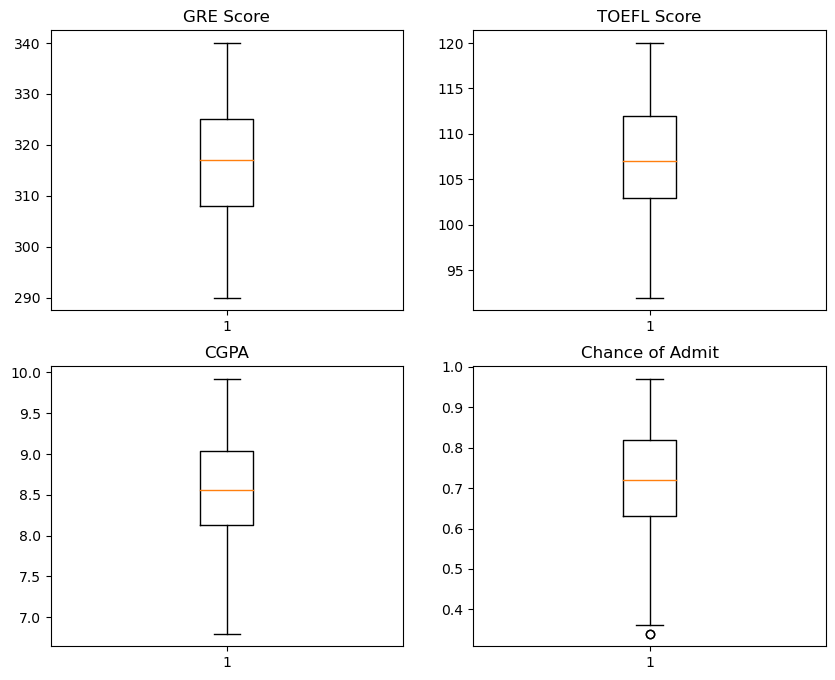

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs[0,0].boxplot(df['GRE Score'])
axs[0,0].set_title('GRE Score')
axs[0,1].boxplot(df['TOEFL Score'])
axs[0,1].set_title('TOEFL Score')
axs[1,0].boxplot(df['CGPA'])
axs[1,0].set_title('CGPA')
axs[1,1].boxplot(df['Chance of Admit'])
axs[1,1].set_title('Chance of Admit')
plt.show()

In [11]:
for key, value in column_outlier_dictionary.items():
    print(f'The column \'{key}\' has {len(value[0]) + len(value[1])} outliers')

The column 'GRE Score' has 0 outliers
The column 'TOEFL Score' has 0 outliers
The column 'CGPA' has 0 outliers
The column 'Chance of Admit' has 2 outliers


## Insight
- From the above plots and analysis, I will not remove any outliers

### 4.1.2. Remove the outliers

In [12]:
remove_outliers = False
if True == remove_outliers:
    for key, value in column_outlier_dictionary.items():
        lower_outliers = value[0]
        higher_outliers = value[1]
        df.drop(lower_outliers.index, inplace=True)
        df.drop(higher_outliers.index, inplace=True)
else:
    print('Not removing any outliers')

Not removing any outliers


## 4.2. Univariate analysis
### 4.2.1. Numerical Variables

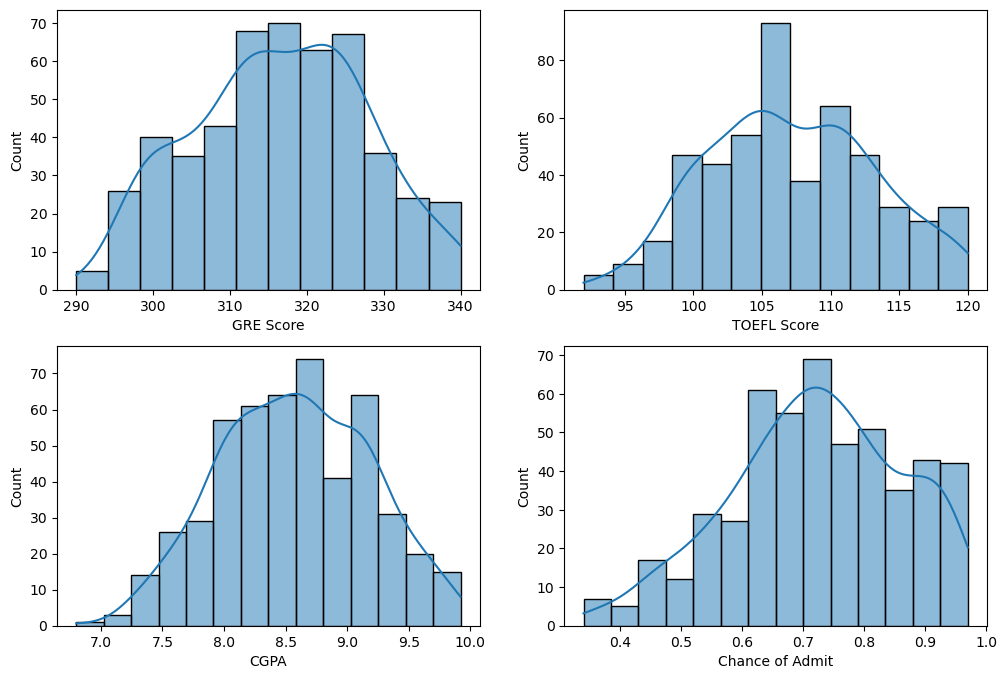

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12, 8))
sns.histplot(data=df, x = "GRE Score", kde=True, ax=axes[0,0])
sns.histplot(data=df, x = "TOEFL Score", kde=True, ax=axes[0,1])
sns.histplot(data=df, x = "CGPA", kde=True, ax=axes[1,0])
sns.histplot(data=df, x = "Chance of Admit", kde=True, ax=axes[1,1])
plt.show()

### 4.2.2. Categorical Variables

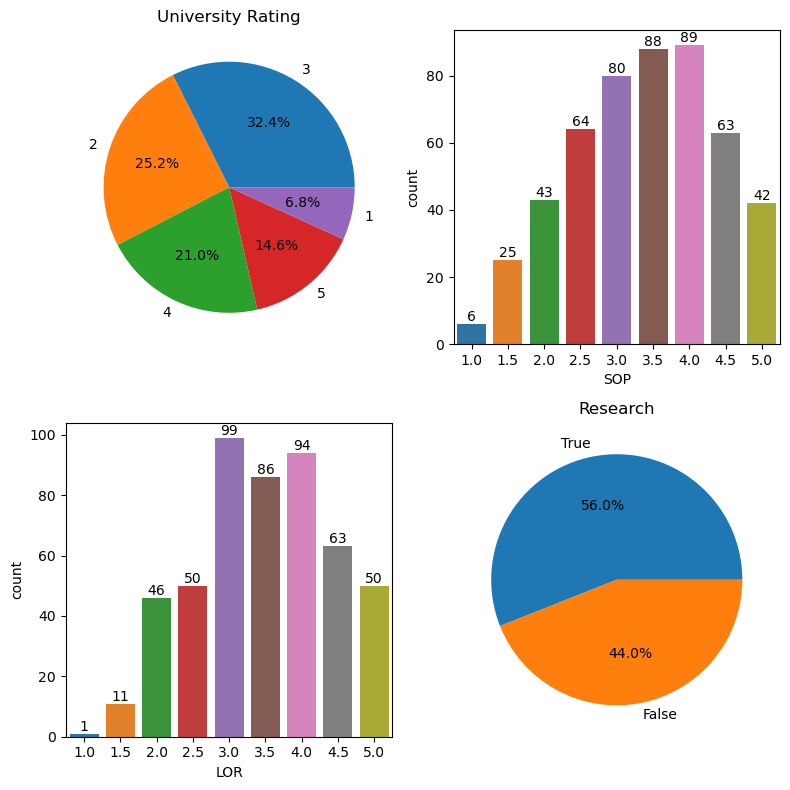

In [14]:
categorical_columns = ['University Rating', 'SOP', 'LOR', 'Research']
fig, axes = plt.subplots(2,2,figsize=(8,8))
data = df["University Rating"].value_counts()
axes[0,0].pie(data.values, labels = data.index, autopct='%.1f%%')
axes[0,0].set_title("University Rating")
ax = sns.countplot(ax=axes[0,1], data=df, x='SOP')
ax.bar_label(ax.containers[0])
ax = sns.countplot(ax=axes[1,0], data=df, x='LOR')
ax.bar_label(ax.containers[0])
data = df["Research"].value_counts()
axes[1,1].pie(data.values, labels = data.index, autopct='%.1f%%')
axes[1,1].set_title("Research")
fig.tight_layout()
plt.show()

## Insight
- A large chunk of applicants, 32.4%, are associated with university with rating 3
- SOP 4 has the maximum applicants, 89
- LOR 3 has the maximum applicants, 99
- 56% of the applicants have research experience

## 4.3. Bivariate analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dz31jl\AppData\Local\Temp\ipykernel_25140\3607642737.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 500x500 with 0 Axes>

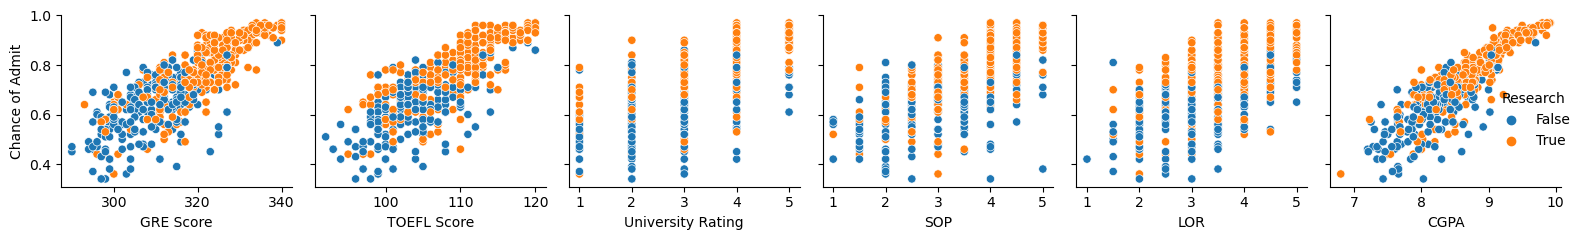

In [15]:
plt.figure(figsize=(5,5))
sns.pairplot(df,  
             x_vars = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], 
             y_vars = ['Chance of Admit'],            
             hue='Research')
plt.tight_layout()
plt.show()

## Insight
- **GRE Score, TOEFL Score and CGPA** exhibit a linear relation with **Chance of Admit**
- Applicants with high **University Rating, SOP and LOR** have higher chance of admission
- It is also very evident that an appicant who has research experience has higher chance of admission

## 4.4. Multivariate analysis

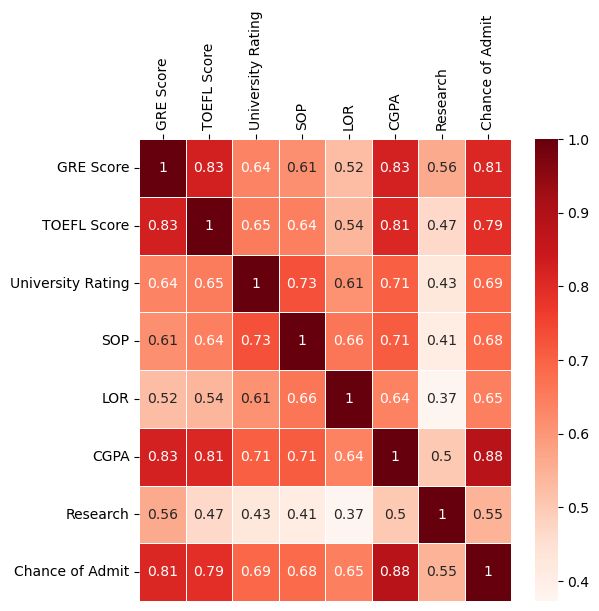

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
#sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, linewidth=0.5, cmap = "Reds", ax=ax)
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap = "Reds", ax=ax)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

## Insight
- The heatmap clearly shows that **all the columns/feature** have **good correlation with *Chance of Admit*** implying all these features are important in deciding the chance of admission.
- Among the features, ***GRE Score, TOEFL Score and CGPA*** are highly correlated with each other as well as target ***Chance of Admit***
- There are no features that have a high(>0.9) correlation with other features, hence no features will be dropped as of now

# 5. Prepare data for modeling
## 5.1. Encode categorical variables

*Research* is the only categorical variable but it has only 2 categories, True and False. I will convert True and False back to 1 and 0 and hence encoding is not necessary.

In [17]:
df['Research'] = df['Research'].astype('int8')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## 5.2. Train-test split

In [18]:
y = df[['Chance of Admit']]
X = df.drop(columns='Chance of Admit')\

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400, 1), (100, 1))

## 5.3. Perform data normalization/standardization
Data normalization/standardization is required so that features with higher scales do not dominate the model's performance. Hence all features should have same scale\
I will use Min-Max scaling as not all the features are normally distributed. 

**Data before scaling**

In [19]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
107,338,117,4,3.5,4.5,9.46,1
336,319,110,3,3.0,2.5,8.79,0
71,336,112,5,5.0,5.0,9.76,1
474,308,105,4,3.0,2.5,7.95,1
6,321,109,3,3.0,4.0,8.20,1


In [20]:
columns_to_scale = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']
#Initialize an object of class MinMaxScaler()
min_max_scaler = MinMaxScaler()
# Fit min_max_scaler to training data
min_max_scaler.fit(X_train[columns_to_scale])
# Scale the training and testing data
X_train[columns_to_scale] = min_max_scaler.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = min_max_scaler.transform(X_test[columns_to_scale])

**Data after scaling**

In [21]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
107,0.96,0.892857,0.75,0.625,0.875,0.852564,1
336,0.58,0.642857,0.50,0.500,0.375,0.637820,0
71,0.92,0.714286,1.00,1.000,1.000,0.948718,1
474,0.36,0.464286,0.75,0.500,0.375,0.368590,1
6,0.62,0.607143,0.50,0.500,0.750,0.448718,1


# 6. Build Linear Regression model
## 6.1. Linear regression from Statsmodel library
By deafult the Linear Regression model from statsmodel fits a line passing through the origin, hence we need to add a 'constant' so that the model also fits the line with intersept

In [22]:
X_train_1 = sm.add_constant(X_train)
X_test_1 = sm.add_constant(X_test)

### Model 1

In [23]:
model_1 = sm.OLS(y_train, X_train_1).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     277.5
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.36e-147
Time:                        12:05:57   Log-Likelihood:                 568.04
No. Observations:                 400   AIC:                            -1120.
Df Residuals:                     392   BIC:                            -1088.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3406      0.01

In [24]:
y_pred_1 = model_1.predict(X_test_1)

In [25]:
def model_performance(y, y_pred, model):
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred,squared = False)
    r2 = r2_score(y, y_pred)
    n = len(y)
    try:
        p = len(model.params)
    except:
        p = len(model.coef_) + len(model.intercept_)
    adj_r2 = 1 - (((1-r2)*(n-1))/(n-p-1))

    print(f'Mean Absolute Error for the model(MAE): {mae:.2f}')
    print(f'Root Mean Squared Error for Model: {rmse:.2f}')
    print(f'R2 Score for Model: {r2:.2f}')
    print(f'Adjusted R2 Score for Model: {adj_r2:.2f}')

In [26]:
model_performance(y_test, y_pred_1, model_1)

Mean Absolute Error for the model(MAE): 0.05
Root Mean Squared Error for Model: 0.06
R2 Score for Model: 0.77
Adjusted R2 Score for Model: 0.75


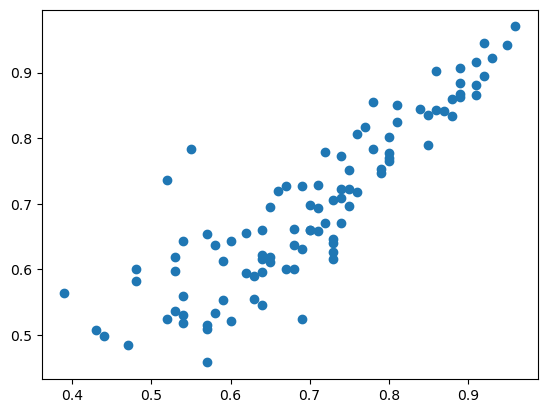

In [27]:
plt.scatter(y_test, y_pred_1)

### Insight
- The R-squared and Adj. R-squared are close to each other indicating that all the features/predictors are relevant
- SOP has a very high p-value of 0.918. 
- I will retrain the model by dropping *SOP* column

## 6.2. Drop columns with p-value > 0.05 (if any) and re-train the model

### Model 2

In [28]:
X_train_2 = X_train.drop(columns=['SOP'])
X_test_2 = X_test.drop(columns=['SOP'])
X_train_2 = sm.add_constant(X_train_2)
X_test_2 = sm.add_constant(X_test_2)
model_2 = sm.OLS(y_train, X_train_2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     324.6
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          7.26e-149
Time:                        12:05:57   Log-Likelihood:                 568.04
No. Observations:                 400   AIC:                            -1122.
Df Residuals:                     393   BIC:                            -1094.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3406      0.01

In [29]:
y_pred_2 = model_2.predict(X_test_2)
model_performance(y_test, y_pred_2, model_2)

Mean Absolute Error for the model(MAE): 0.05
Root Mean Squared Error for Model: 0.06
R2 Score for Model: 0.77
Adjusted R2 Score for Model: 0.75


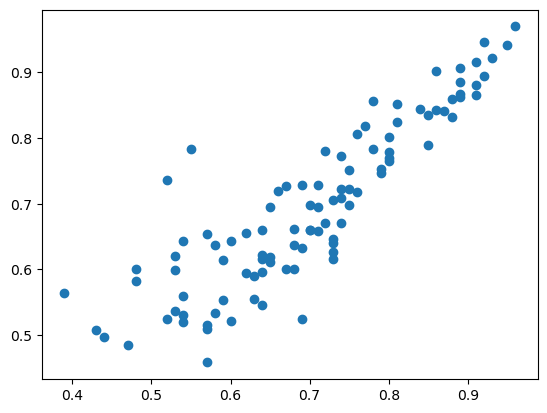

In [30]:
plt.scatter(y_test, y_pred_2)

### Insight
- All the model performance metrics have remained same implying that the *SOP* columns was not so important

# 7. Test the assumptions of linear regression
## 7.1. Multicollinearity Check
VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis. It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.\
The VIF calculation regresses each independent variable on all the others and calculats the R-squared value. An intercept term should be included to accurately represent the model and to avoid misestimating the contribution of the predictor variables.

In [31]:
features_df = df.drop(columns=['Chance of Admit'])
features_df = sm.add_constant(features_df)  # Adding a constant column for the intercept
vif_df = pd.DataFrame()
vif_df['Features'] = features_df.columns
vif_df['VIF'] = [variance_inflation_factor(features_df.values, idx) for idx in range(len(features_df.columns))]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by='VIF', ascending=False)
vif_df             

,Features,VIF
0,const,1511.50
6,CGPA,4.78
1,GRE Score,4.46
2,TOEFL Score,3.90
4,SOP,2.84
3,University Rating,2.62
5,LOR,2.03
7,Research,1.49


- The VIF score for the **const** term is high as expected as the constant term (intercept) is perfectly collinear with the sum of all the other predictors, making its VIF high
- As none of the features have a VIF > 5, it indicates that there is no multicollinearity but for the sake of experimentation I will drop ***CGPA***, the feature with high VIF amoung the other features, and again find the VIF for remaining features

In [32]:
features_df = features_df.drop(columns=['CGPA'])
vif_df = pd.DataFrame()
vif_df['Features'] = features_df.columns
vif_df['VIF'] = [variance_inflation_factor(features_df.values, idx) for idx in range(len(features_df.columns))]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by='VIF', ascending=False)
vif_df         

,Features,VIF
0,const,1485.48
1,GRE Score,3.76
2,TOEFL Score,3.59
4,SOP,2.74
3,University Rating,2.57
5,LOR,1.94
6,Research,1.49


### Insight
- Finally, based on the VIF score, the features ***GRE Score, TOEFL Score, SOP, University Rating, LOR and Researche*** do not exhibit multicollinearity

### Model 3
Retrain the model only with features ***GRE Score, TOEFL Score, SOP, University Rating, LOR and Researche***

In [33]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
107,0.96,0.892857,0.75,0.625,0.875,0.852564,1
336,0.58,0.642857,0.50,0.500,0.375,0.637820,0
71,0.92,0.714286,1.00,1.000,1.000,0.948718,1
474,0.36,0.464286,0.75,0.500,0.375,0.368590,1
6,0.62,0.607143,0.50,0.500,0.750,0.448718,1


In [34]:
X_train_3 = X_train.drop(columns=['CGPA'])
X_test_3 = X_test.drop(columns=['CGPA'])
X_train_3 = sm.add_constant(X_train_3)
X_test_3 = sm.add_constant(X_test_3)
model_3 = sm.OLS(y_train, X_train_3).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.05e-126
Time:                        12:05:57   Log-Likelihood:                 515.98
No. Observations:                 400   AIC:                            -1018.
Df Residuals:                     393   BIC:                            -990.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3732      0.01

In [35]:
y_pred_3 = model_3.predict(X_test_3)
model_performance(y_test, y_pred_3, model_3)

Mean Absolute Error for the model(MAE): 0.06
Root Mean Squared Error for Model: 0.07
R2 Score for Model: 0.69
Adjusted R2 Score for Model: 0.67


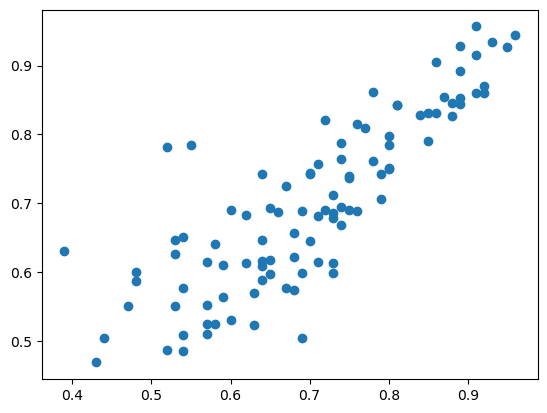

In [36]:
plt.scatter(y_test, y_pred_3)

### Insight
- The R-squared and Adj. R-squared values have reduced in comaprision with Model 2. This indicates that the removed features were important predictors in the model.

## 7.2. Mean of residuals
Residuals are the errors between the observed values and the values predicted by the regression model. The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average

In [37]:
# Using model 2's output
residuals = y_test.values.flatten() - y_pred_2.values.flatten()
residuals.mean()

0.0041030675622921835

### Insight
- As the mean of residual is close to 0, the model can be considered to be unbiased

## 7.3. Linear relationship between independent & dependent variables

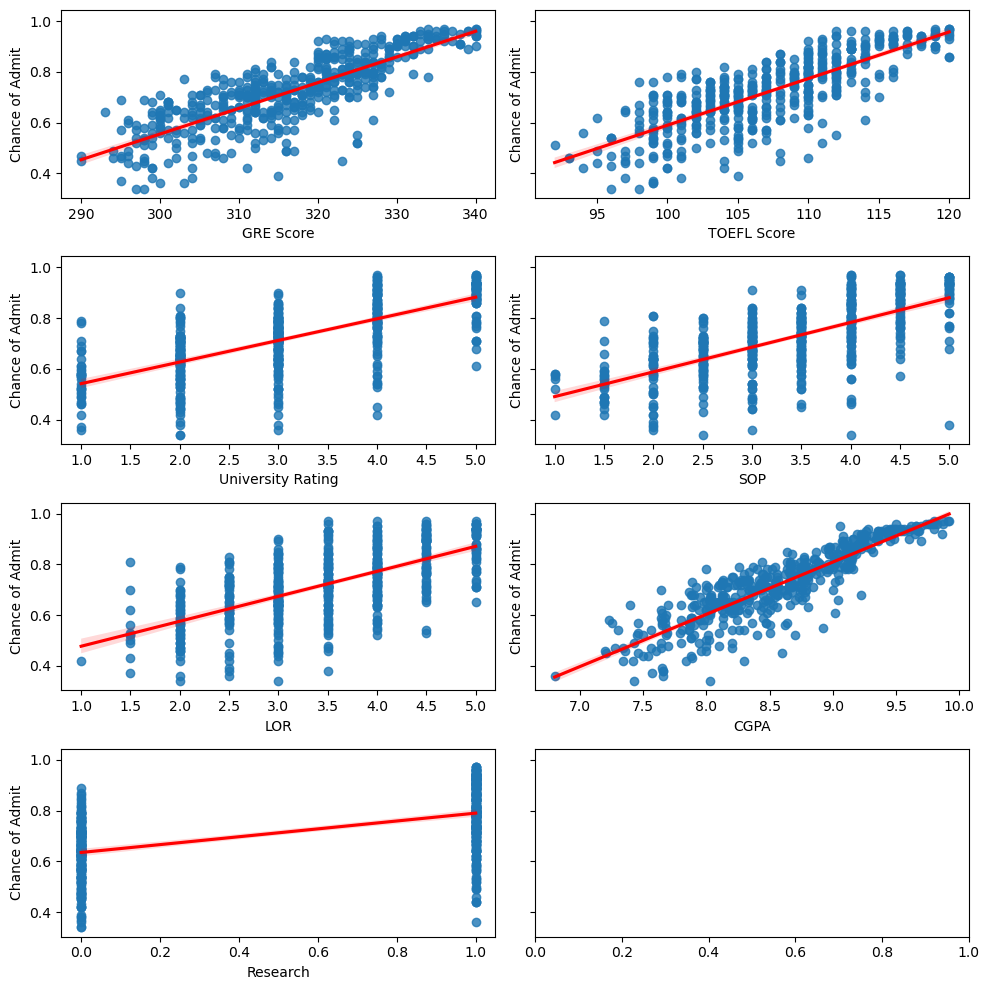

In [38]:
fig, axes = plt.subplots(4,2, sharey=True, figsize=(10,10))
sns.regplot(ax = axes[0,0], data=df, y = 'Chance of Admit', x='GRE Score', line_kws=dict(color="r"))
sns.regplot(ax = axes[0,1], data=df, y = 'Chance of Admit', x='TOEFL Score', line_kws=dict(color="r"))
sns.regplot(ax = axes[1,0], data=df, y = 'Chance of Admit', x='University Rating', line_kws=dict(color="r"))
sns.regplot(ax = axes[1,1], data=df, y = 'Chance of Admit', x='SOP', line_kws=dict(color="r"))
sns.regplot(ax = axes[2,0], data=df, y = 'Chance of Admit', x='LOR', line_kws=dict(color="r"))
sns.regplot(ax = axes[2,1], data=df, y = 'Chance of Admit', x='CGPA', line_kws=dict(color="r"))
sns.regplot(ax = axes[3,0], data=df, y = 'Chance of Admit', x='Research', line_kws=dict(color="r"))
fig.tight_layout()
plt.show()

In [39]:
corr_matrix = df.corr(method='pearson')['Chance of Admit']
corr_matrix

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

### Insight
- From the above regression plots and the Pearson correlation values, ***GRE Score, TOEFL Score*** and ***CGPA*** exhibit strong linear relation with dependent variable ***Chance of Admit***

## 7.4. Test for Homoscedasticitys

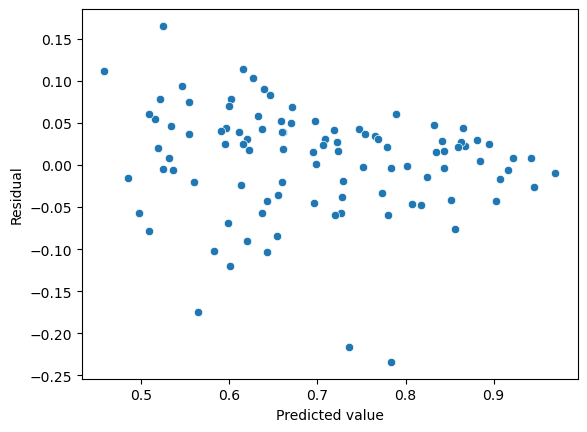

In [40]:
sns.scatterplot(x=y_pred_2, y=residuals)
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.show()

From the above, it looks like the variance of the residual is decreasing with the independent variable.\
**Goldfeld-Quandt test for homoskedasticity**\
H0: Homoscedasticity is present\
H1: Heteroscedasticity is present

In [41]:
sms.diagnostic.het_goldfeldquandt(y_train, X_train_2, alternative='decreasing')

(0.9891168815764442, 0.4697444179788967, 'decreasing')

### Insight
- As the p-value of the Goldfeld-Quandt homoskedasticity test is greater than 0.05, we can conslude that regression model follows homoscedasticity

## 7.5. Normality of residuals
Normality of residuals refers to the assumption that the residuals are normally distributed.

<Axes: ylabel='Count'>

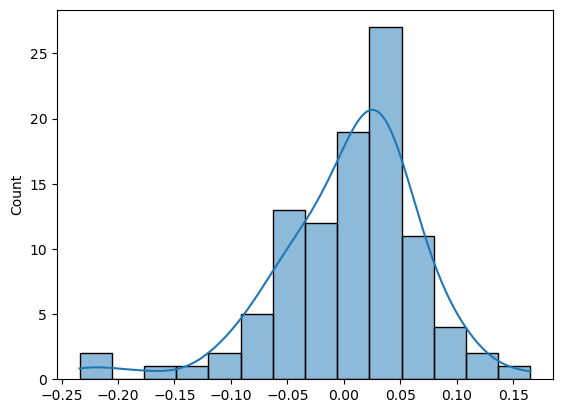

In [42]:
sns.histplot(residuals, kde=True)

**Shapiro-Wilk test for normality**\
H0: The data is normally distributed\
H1: The data is not normally distributed\

In [43]:
stats.shapiro(residuals)

ShapiroResult(statistic=0.939202606678009, pvalue=0.00017242538160644472)

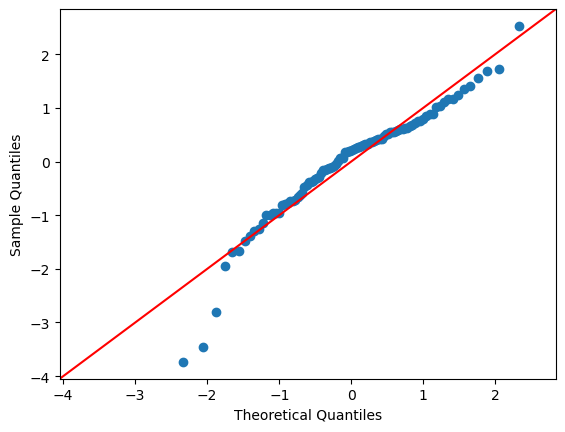

In [44]:
sm.qqplot(residuals,dist = stats.distributions.norm,fit=True,line="45")
plt.show()

### Insight
- The histogram of residuals show negative skewness
- The Shapiro-Wilk test concludes that the distribution is not normal
- Q-Q plot shows that the residuals are slighlty deviating from the diagonal line

# 8. Try out Linear, Ridge and Lasso regression from sklearn

## 8.1. Linear Regression

In [45]:
regr_lr = LinearRegression()
regr_lr.fit(X_train, y_train)
y_pred_lr = regr_lr.predict(X_test)
print({col:coef for col,coef in zip(X_train.columns, regr_lr.coef_[0])})
model_performance(y_test, y_pred_lr, regr_lr)

{'GRE Score': 0.107070446, 'TOEFL Score': 0.07757088, 'University Rating': 0.022227751, 'SOP': 0.0020412393, 'LOR': 0.0816535, 'CGPA': 0.35896856, 'Research': 0.024125628}
Mean Absolute Error for the model(MAE): 0.05
Root Mean Squared Error for Model: 0.06
R2 Score for Model: 0.77
Adjusted R2 Score for Model: 0.76


## 8.2. Ridge Regression

In [46]:
regr_ridge = Ridge(alpha = 0.1)
regr_ridge.fit(X_train, y_train)
y_pred_ridge = regr_ridge.predict(X_test)
print({col:coef for col,coef in zip(X_train.columns, regr_ridge.coef_[0])})
model_performance(y_test, y_pred_ridge, regr_ridge)

{'GRE Score': 0.10922609, 'TOEFL Score': 0.079459876, 'University Rating': 0.023035403, 'SOP': 0.0035257668, 'LOR': 0.082220495, 'CGPA': 0.3500553, 'Research': 0.024308415}
Mean Absolute Error for the model(MAE): 0.05
Root Mean Squared Error for Model: 0.06
R2 Score for Model: 0.77
Adjusted R2 Score for Model: 0.76


## 8.3. Lasso Regression

In [47]:
regr_lasso = Lasso(alpha = 0.001)
regr_lasso.fit(X_train, y_train)
y_pred_lasso = regr_lasso.predict(X_test)
print({col:coef for col,coef in zip(X_train.columns, regr_lasso.coef_)})
model_performance(y_test, y_pred_lasso, regr_lasso)

{'GRE Score': 0.1037473, 'TOEFL Score': 0.07275442, 'University Rating': 0.025786784, 'SOP': 0.0013959017, 'LOR': 0.072684325, 'CGPA': 0.34205964, 'Research': 0.025733968}
Mean Absolute Error for the model(MAE): 0.05
Root Mean Squared Error for Model: 0.06
R2 Score for Model: 0.77
Adjusted R2 Score for Model: 0.75


## 8.4. Comaprision between Linear, Ridge and Lasso Regression

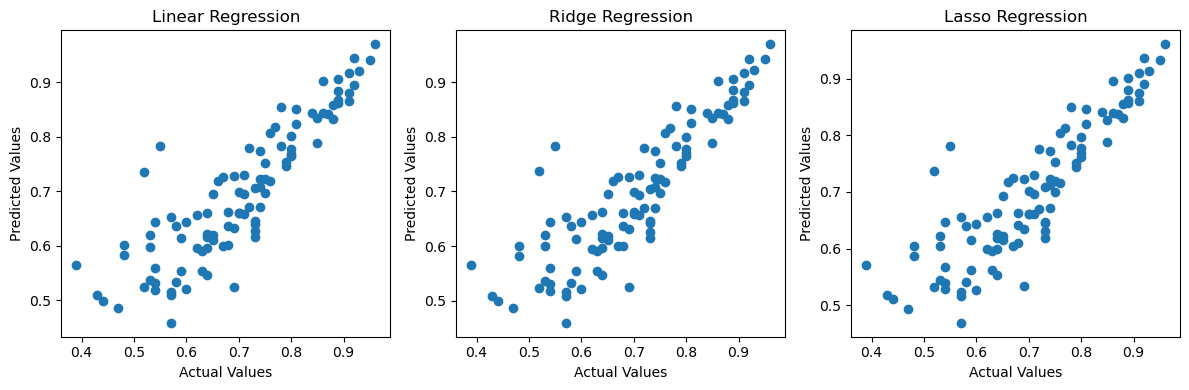

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].scatter(x=y_test, y=y_pred_lr)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Linear Regression')
axes[1].scatter(x=y_test, y=y_pred_ridge)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Ridge Regression')
axes[2].scatter(x=y_test, y=y_pred_lasso)
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predicted Values')
axes[2].set_title('Lasso Regression')
fig.tight_layout()
plt.show()

### Insight
- It can be observed that the **performace** of both **Ridge(with alpha=0.1)** and **Lasso(with alpha=0.001)** are **similar to Linear Regression** in terms of performance metrics(like MAE, RMSE, R2 score and Adjusted R2 Score) as well as scatter plot.
- Similar behaviour of Ridge implies that the **predictors in the dataset are not highly correlated with each other**. This is inline with the VIF score too.
- Similar behaviour of the Lasso implies that the **dataset does not have many irrelevent predictors**. **SOP** was the only feature with very low coeffcient value.

# 9. Insights

- There are **500 unique** applicants
- A large chunk of **applicants, 32.4%**, are associated with **university** with **rating 3**
- **SOP 4** has the **maximum applicants**, 89
- **LOR 3** has the **maximum applicants**, 99
- **56%** of the applicants have **research** experience
- **All the columns/feature** have **good correlation with *Chance of Admit***
- ***GRE Score, TOEFL Score and CGPA*** are highly correlated with each other as well as target ***Chance of Admit***
- It is also very evident that an appicant who has **research experience** has **higher chance of admission**
- **None** of the features exhibit **multicollinearity**
- **CGPA** is the **significant predictor** and **SOP** is the **least significant** predictor based on the model coeffecients

 # 10. Recommendation

- The most important factor impacting the admission is the CGPA. The student with higher CGPA is most likely to perform well in GRE and TOEFL. 
- Jamboree can actually ignore SOP while assessing the probability of admision as it is has the least impact on the model's performance
- Jamboree should encourage more students to have research experience so as to increase their chance of admission.